In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [131]:
# Read in the data
df = pd.read_csv('data/cleaned_daily.csv')

# Convert the date column to datetime
df['date'] = pd.to_datetime(df['date'])

#set the format of the date
df['date'] = df['date'].dt.strftime('%Y-%m-%d')

#set datetime as index
df = df.set_index('date')

#set index as datetimeindex
df.index = pd.to_datetime(df.index)

#drop all nan
df = df.dropna()

In [132]:
#create empty dataframe for monthyl data
mdf = pd.DataFrame(columns=["monthlySumMWh","country", "date"])

for country in df["country"].unique():
    a = df["dailySumMWh"][df["country"] == country].resample('M').sum()
    temp = pd.DataFrame({'monthlySumMWh': a, 'country': country, 'date': a.index}).reset_index(drop=True)
    mdf = pd.concat([mdf, temp], ignore_index=True)


In [133]:
#count the NaN values in monthtlySumMWh
np.sum(mdf["monthlySumMWh"]==np.nan)

0

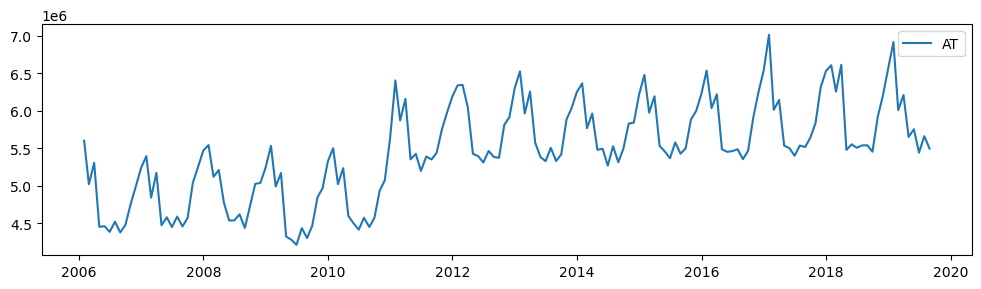

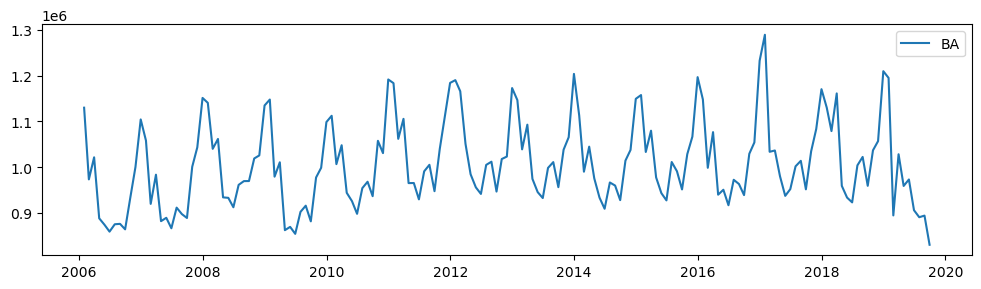

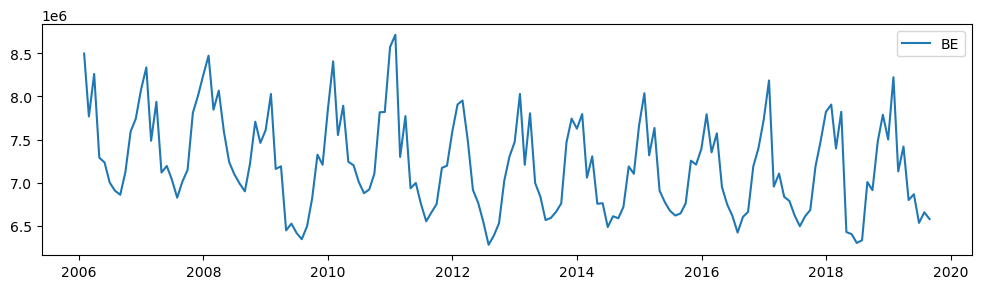

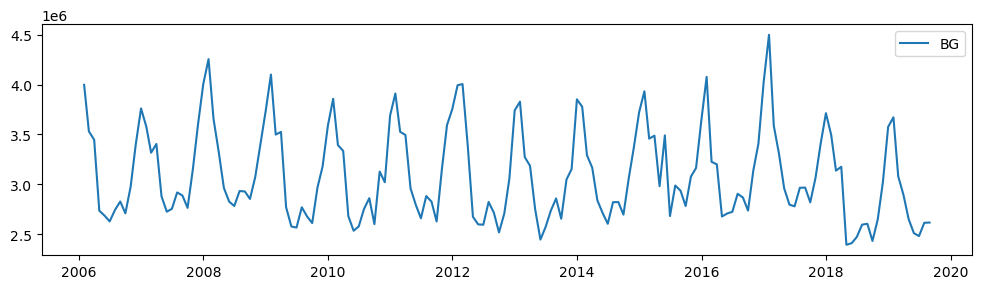

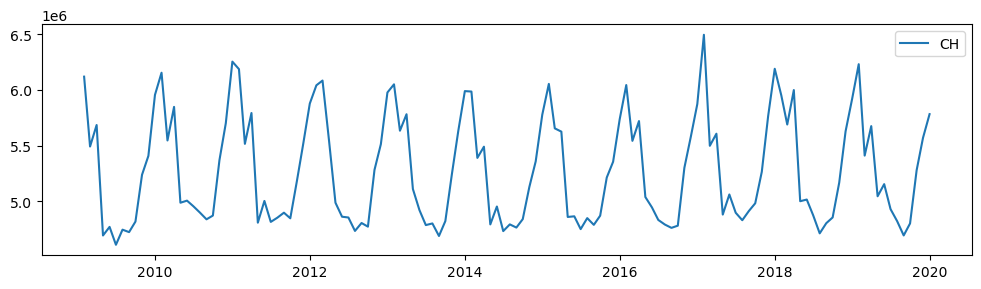

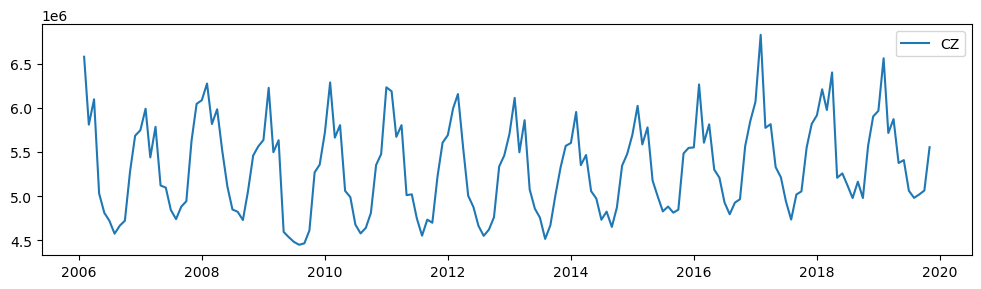

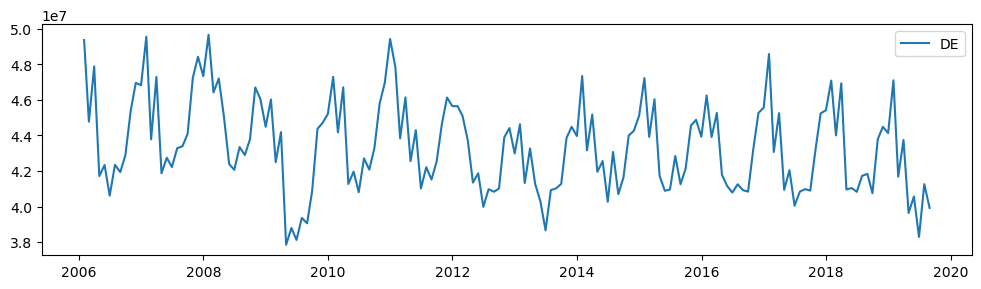

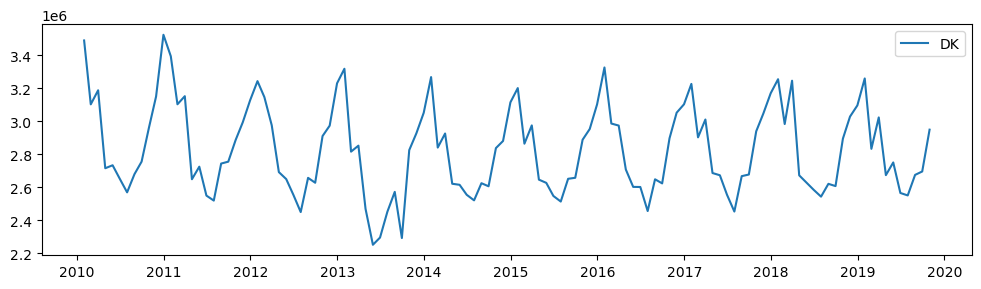

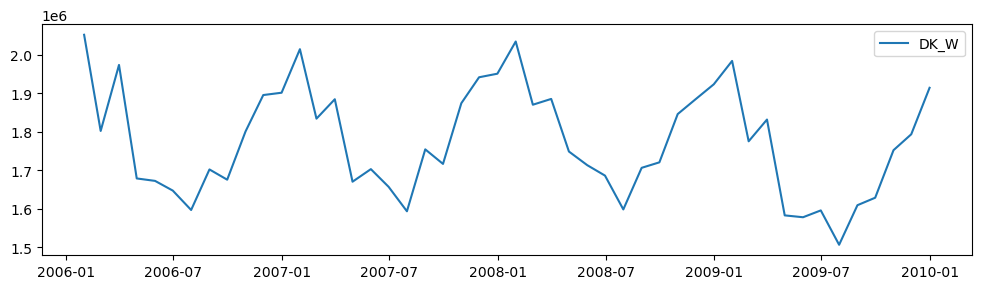

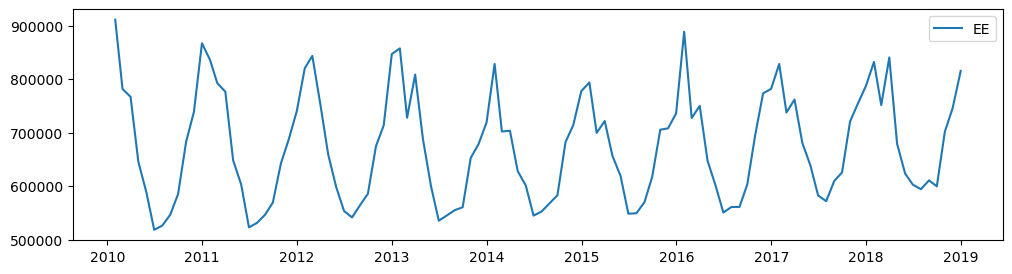

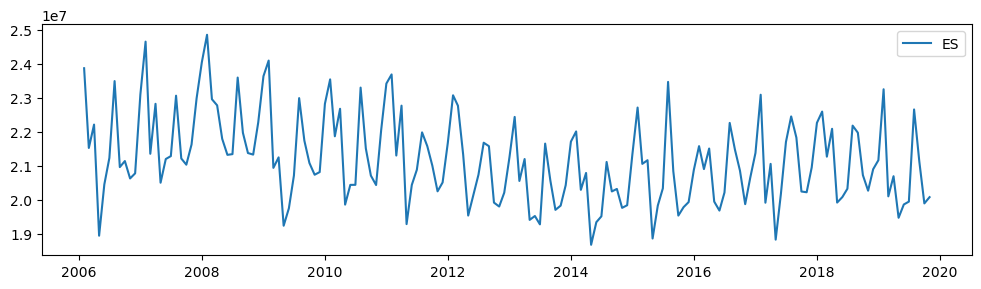

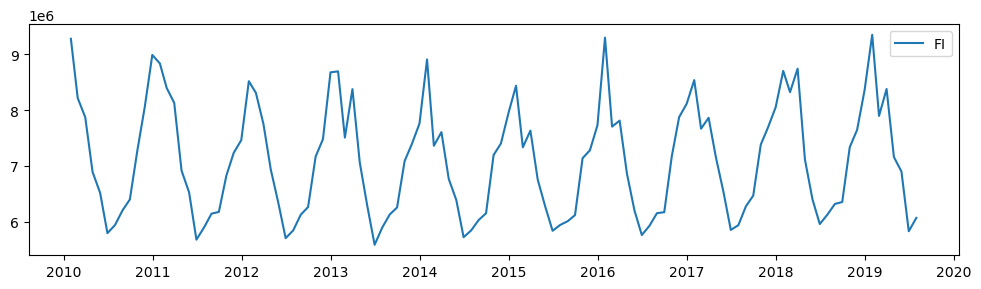

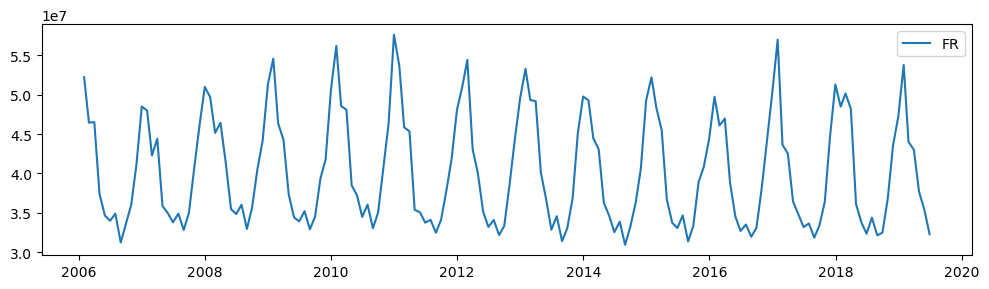

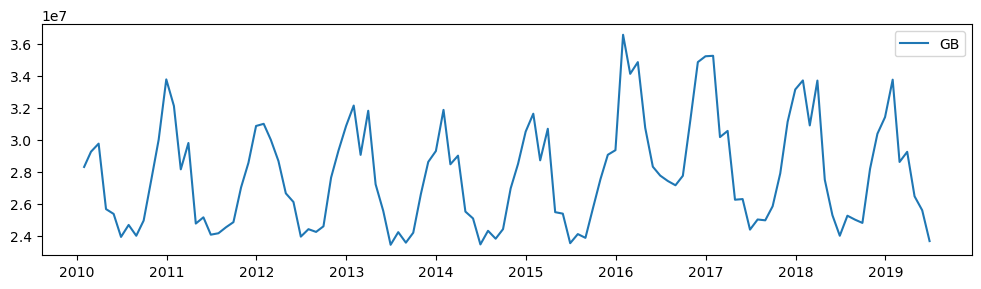

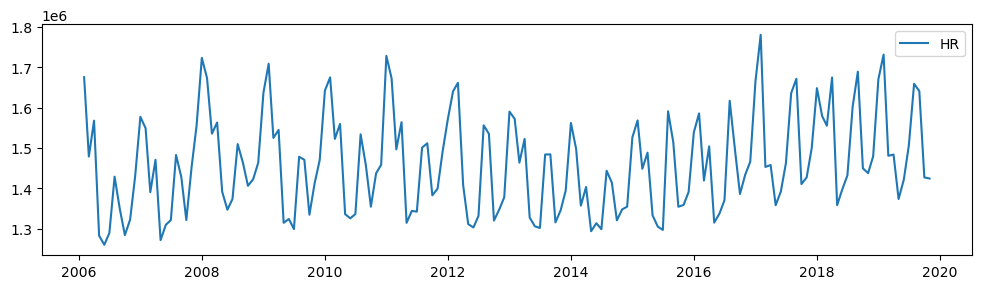

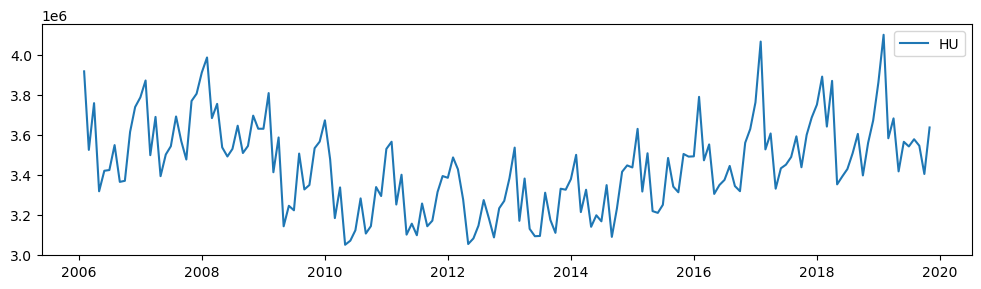

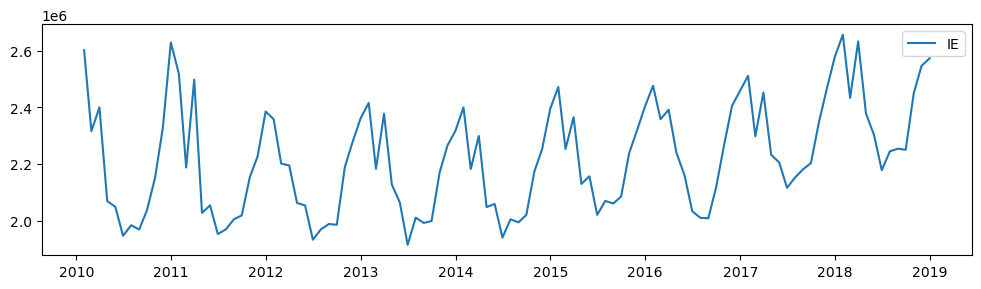

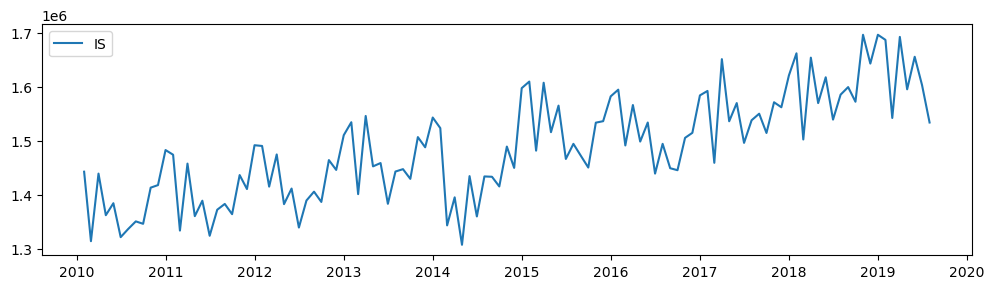

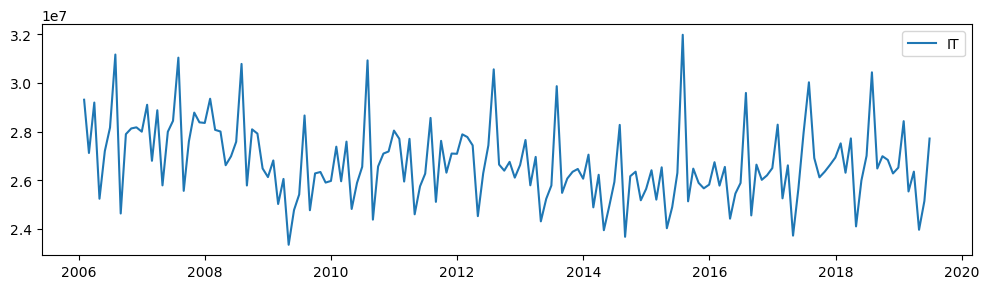

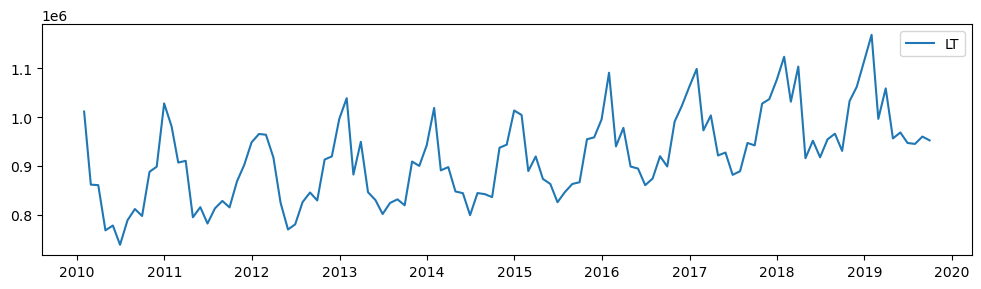

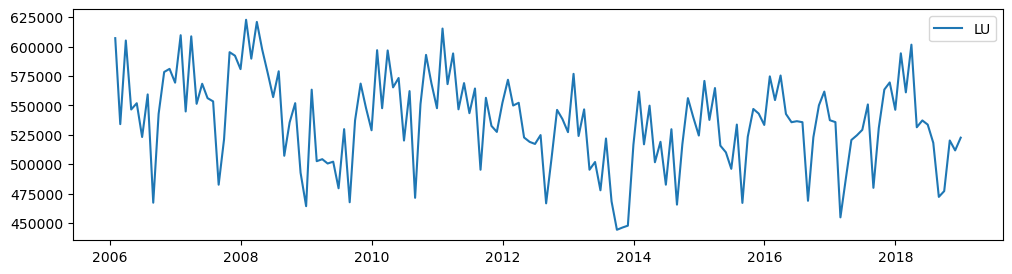

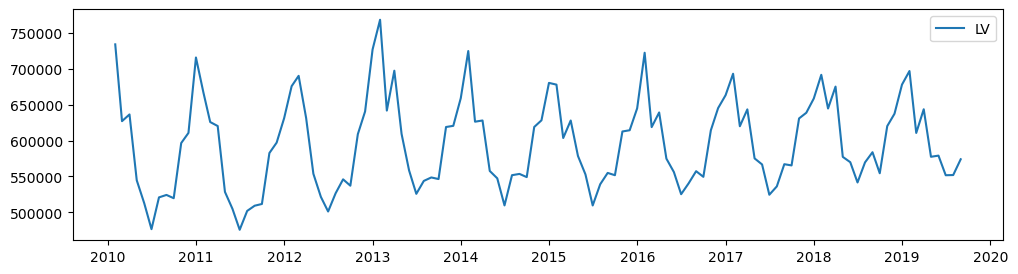

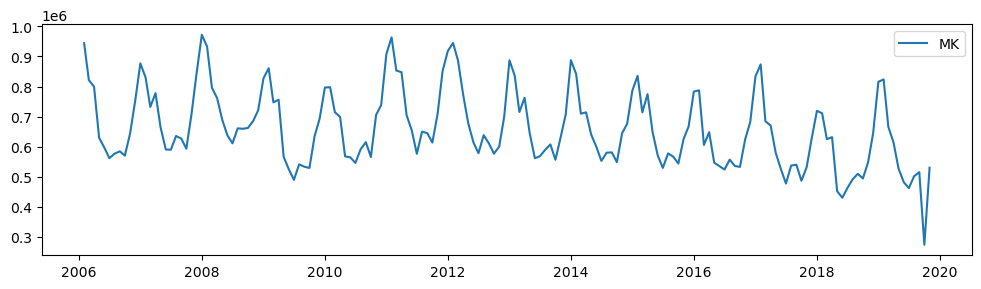

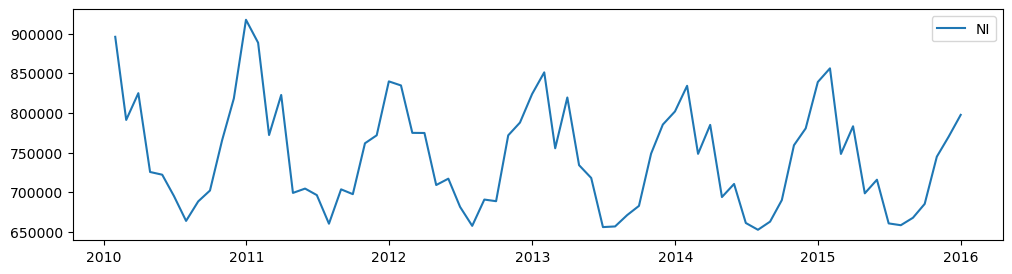

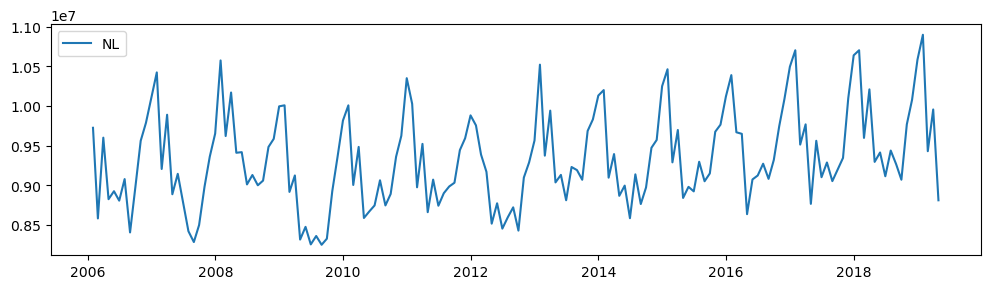

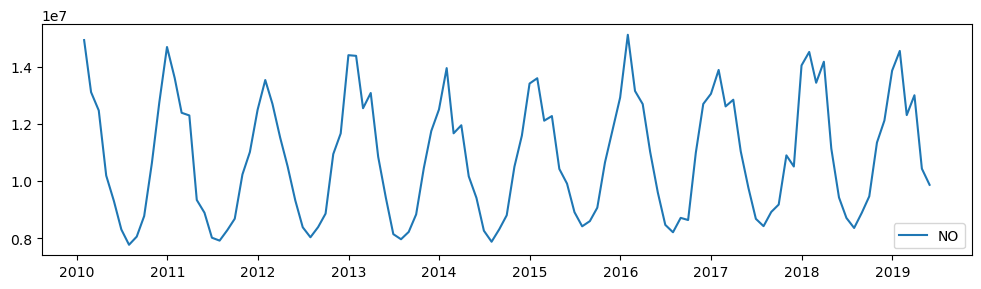

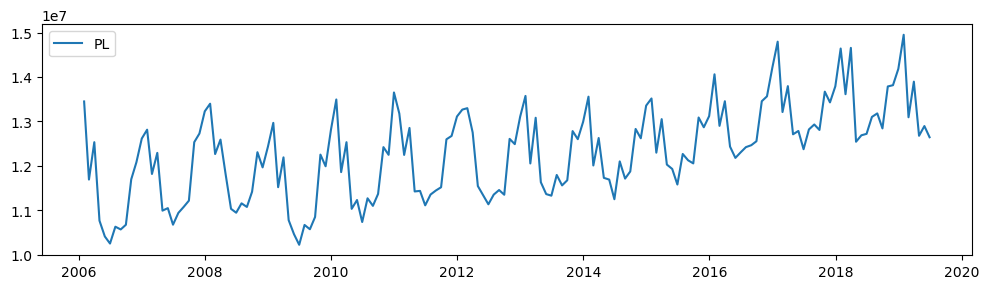

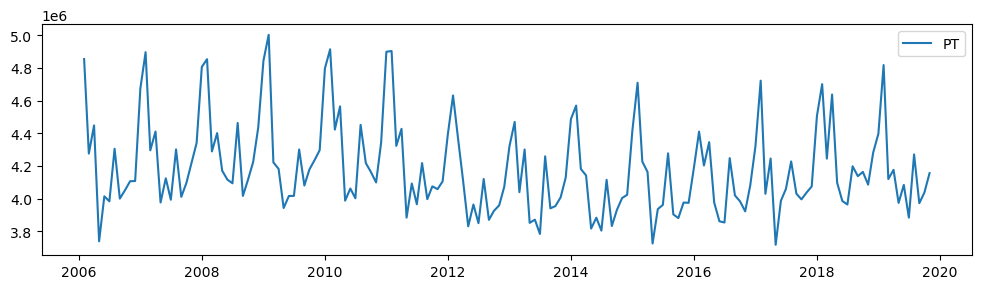

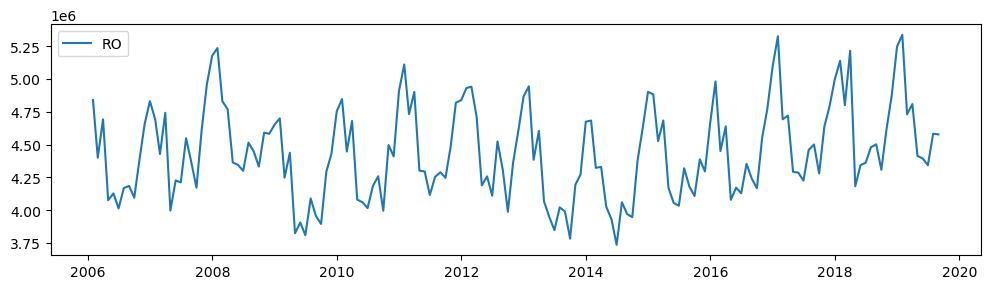

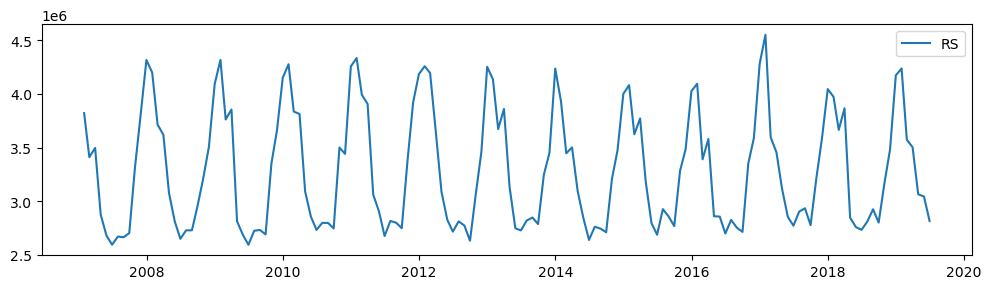

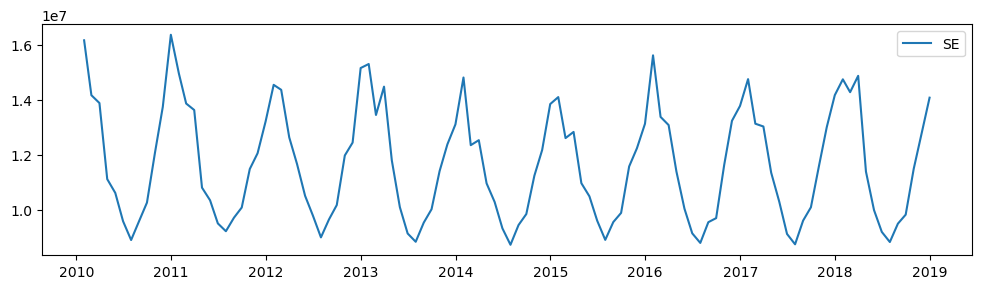

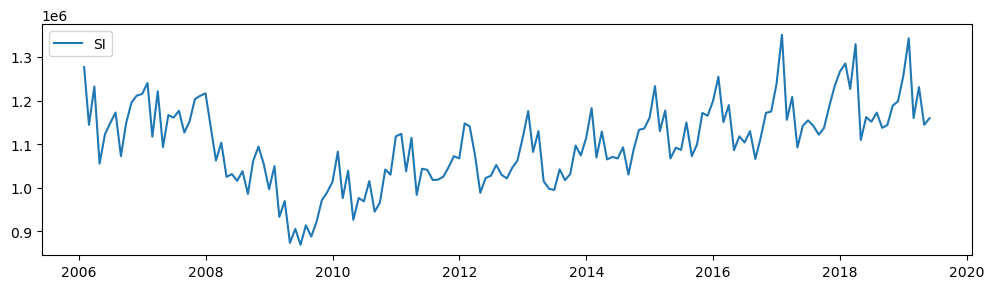

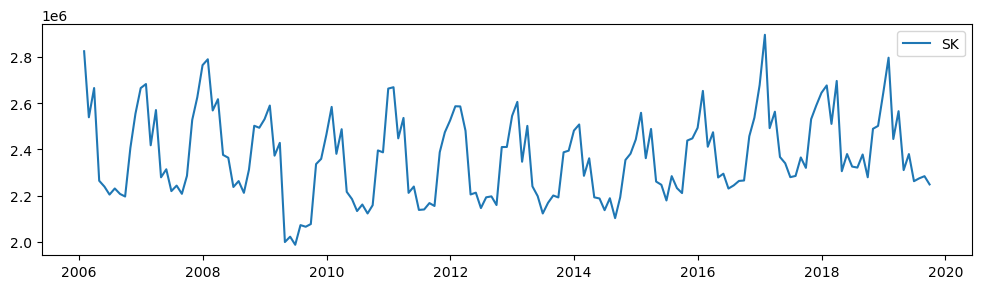

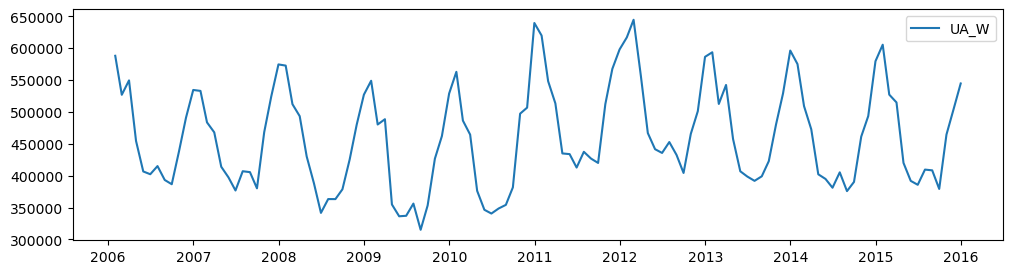

In [134]:
# Create a plot for each group
for name, group in mdf.groupby('country'):
    plt.figure(figsize=(12,3))
    plt.plot(group['date'],group['monthlySumMWh'], label=f'{name}')
    plt.legend()
    plt.show()

In [135]:
mdf

,monthlySumMWh,country,date
0,5.601173e+06,AT,2006-01-31
1,5.021266e+06,AT,2006-02-28
2,5.305890e+06,AT,2006-03-31
3,4.451786e+06,AT,2006-04-30
4,4.460559e+06,AT,2006-05-31
...,...,...,...
4758,4.695252e+06,CH,2019-08-31
4759,4.802950e+06,CH,2019-09-30
4760,5.279902e+06,CH,2019-10-31
4761,5.570112e+06,CH,2019-11-30


In [136]:
#delet last two data points of country MK
mdf = mdf.drop(mdf[(mdf['country'] == 'MK')].index[-2:])

#delet last two data points of country BA
mdf = mdf.drop(mdf[(mdf['country'] == 'BA')].index[-3:])

#for AT start series from 2012
mdf = mdf.drop(mdf[(mdf['country'] == 'AT') & (mdf.date < "01-01-2012")].index)

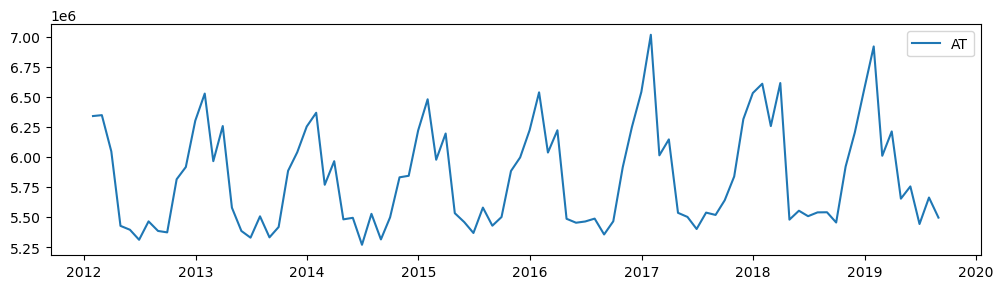

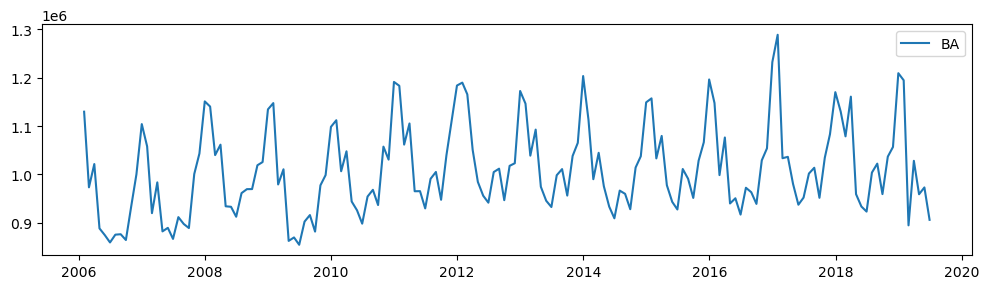

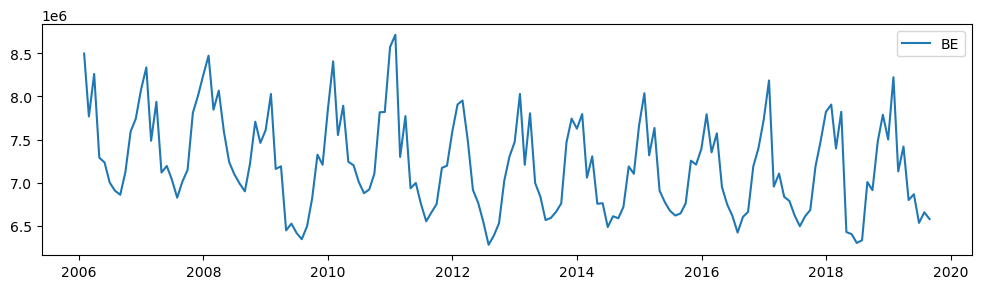

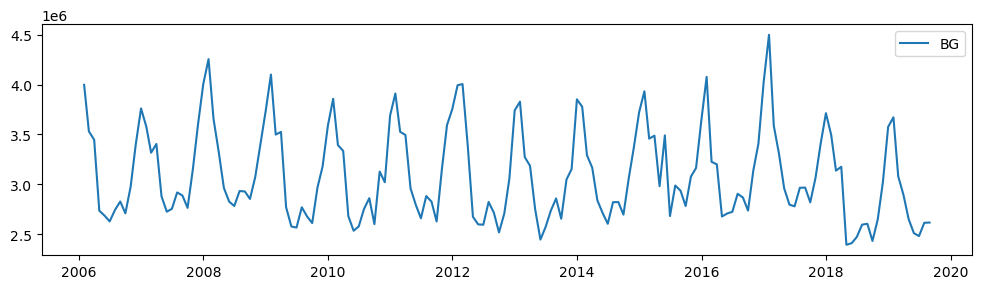

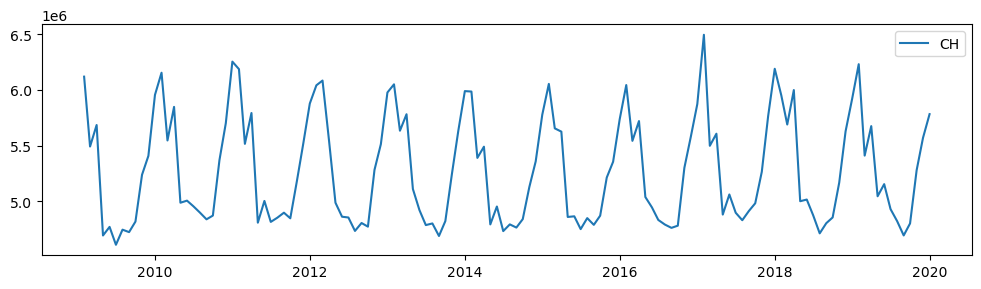

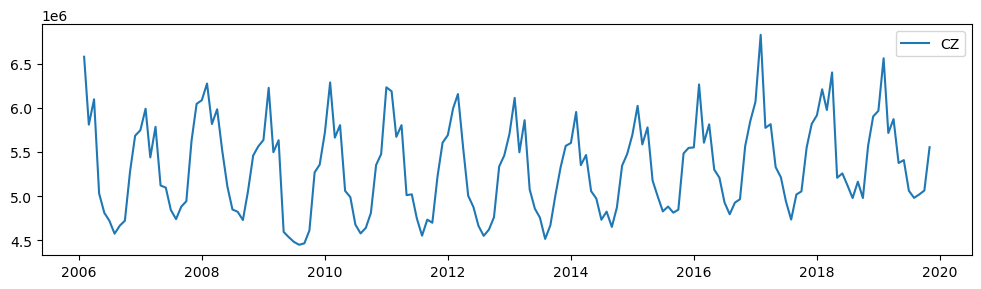

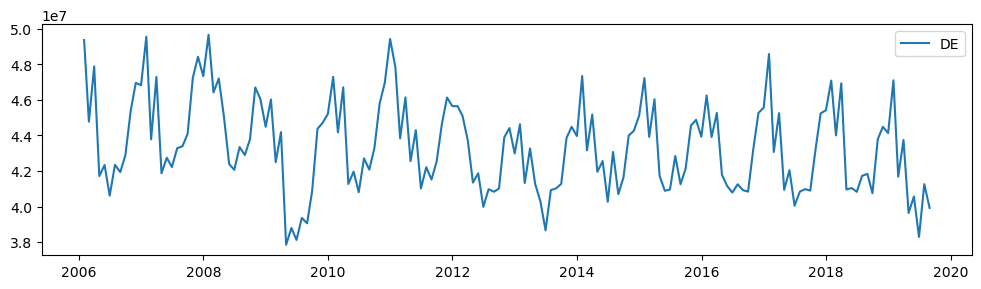

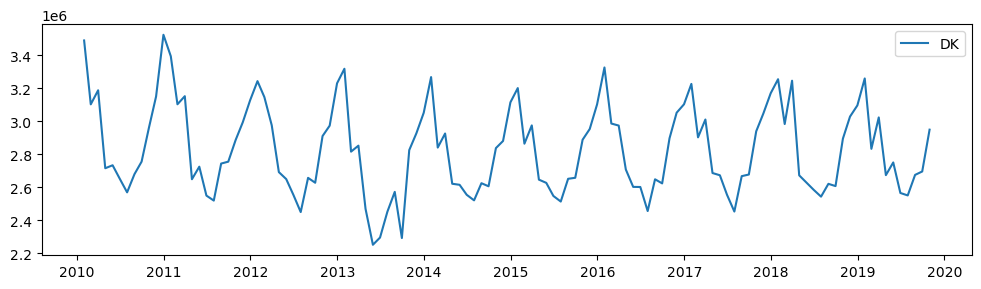

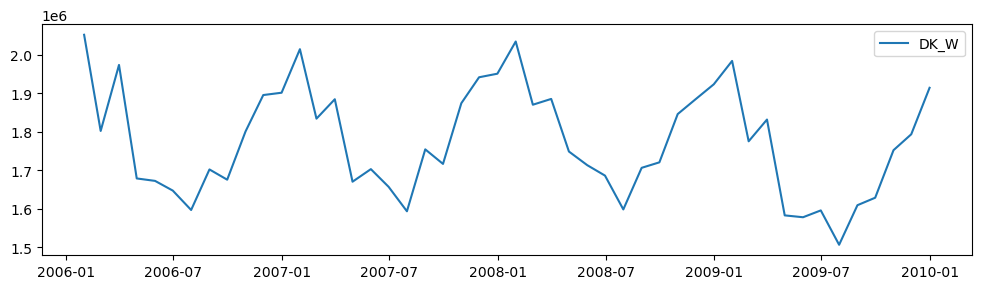

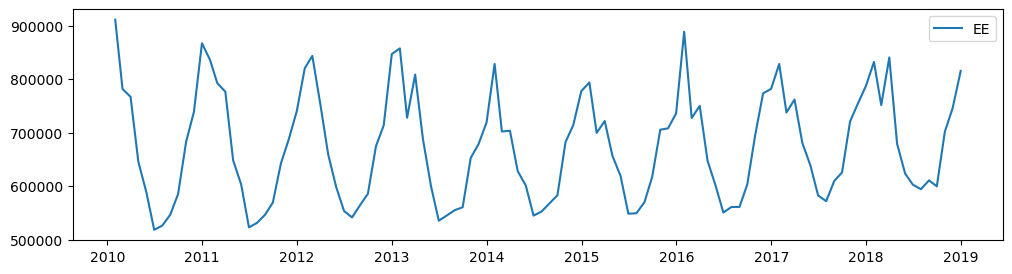

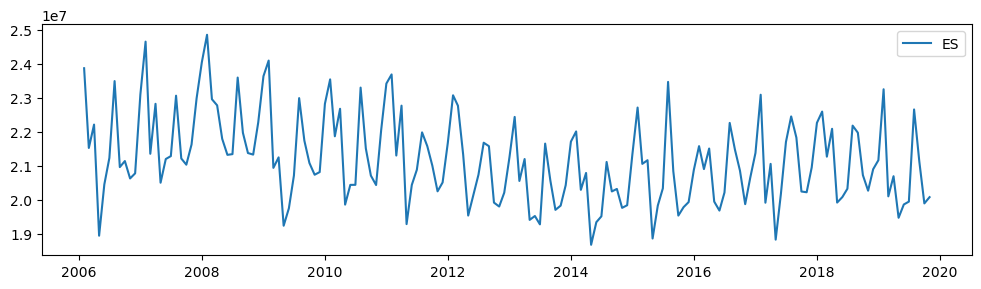

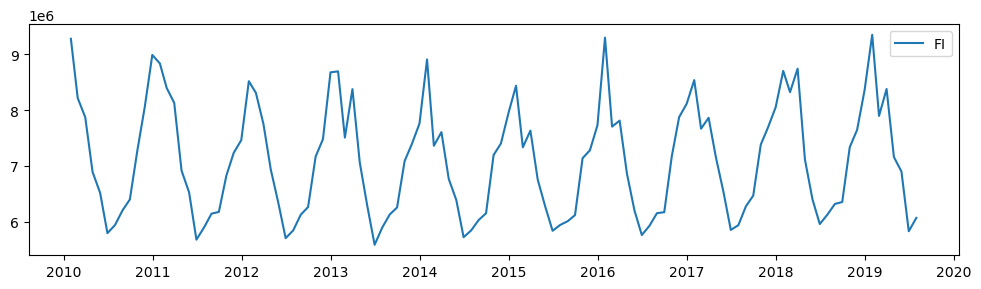

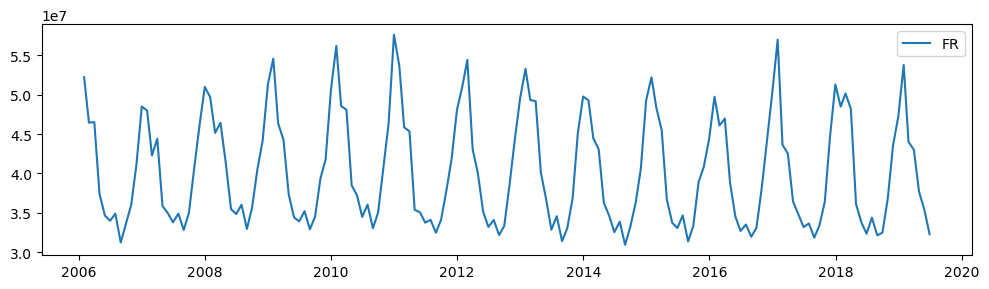

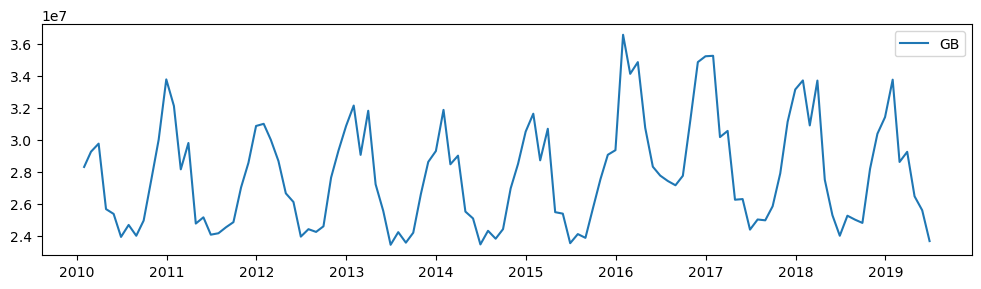

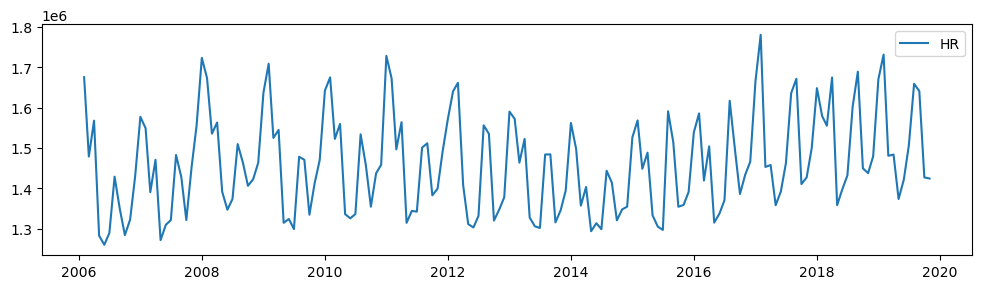

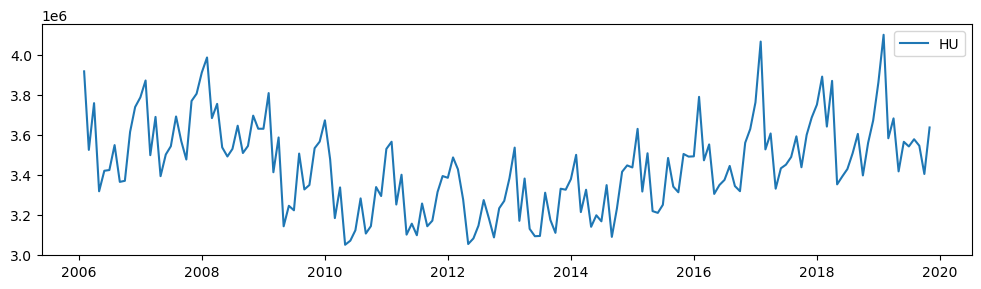

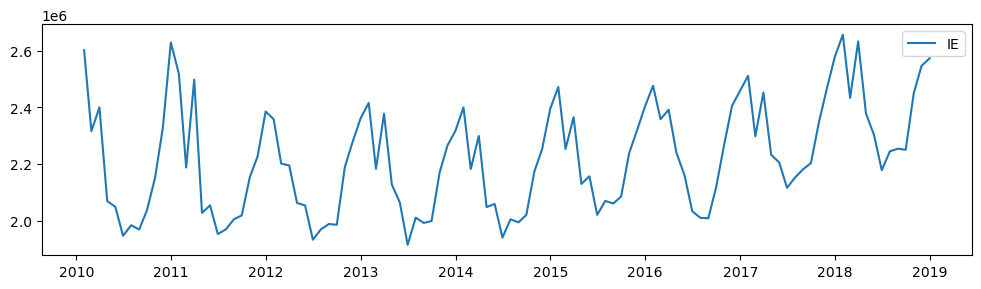

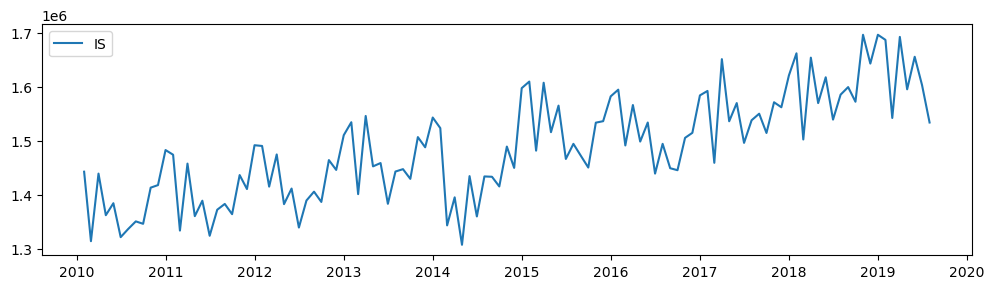

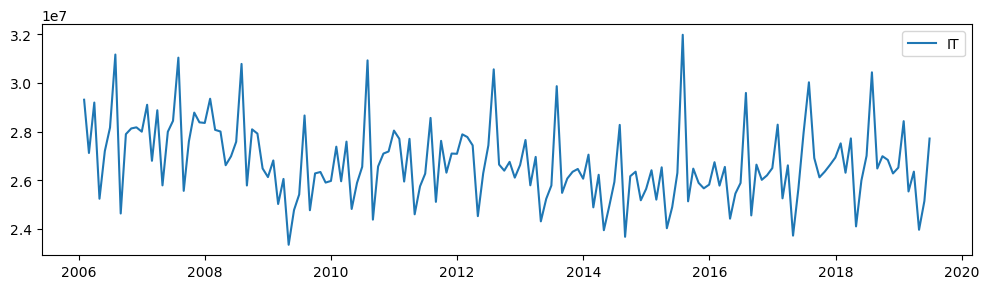

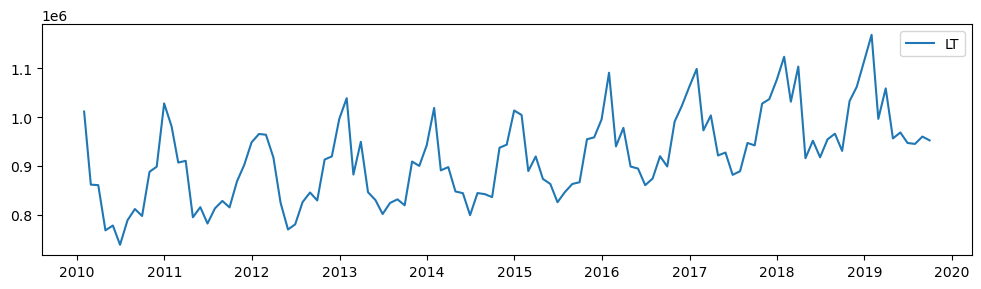

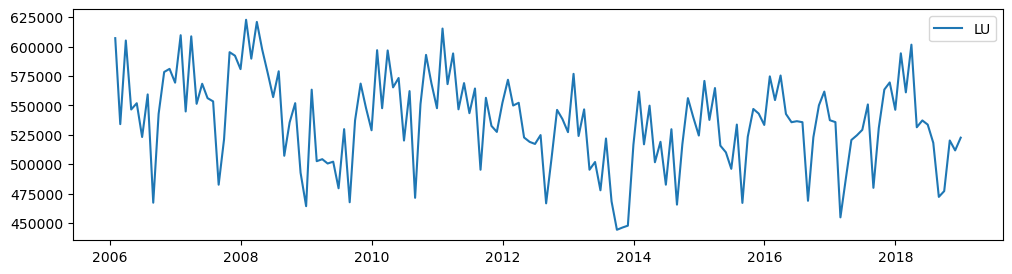

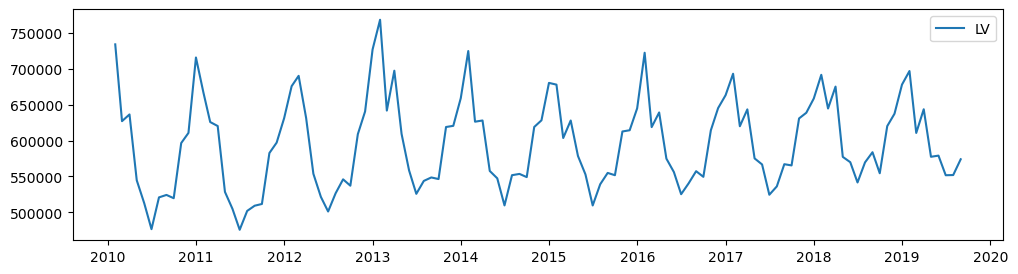

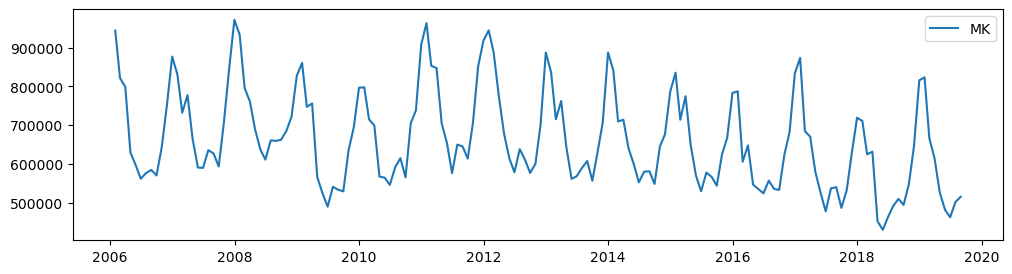

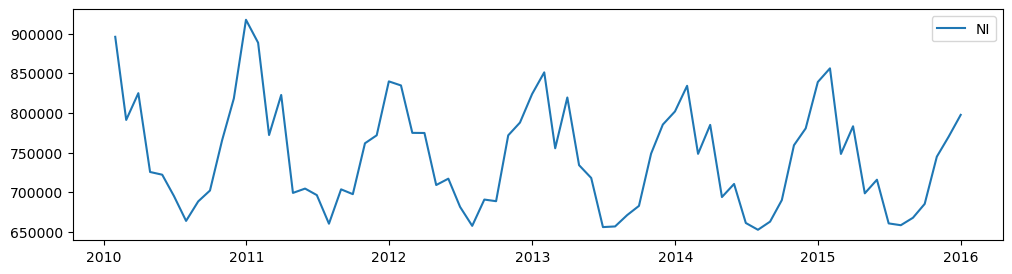

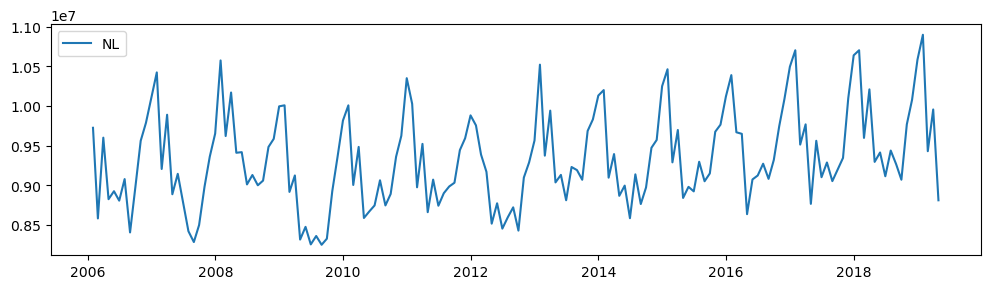

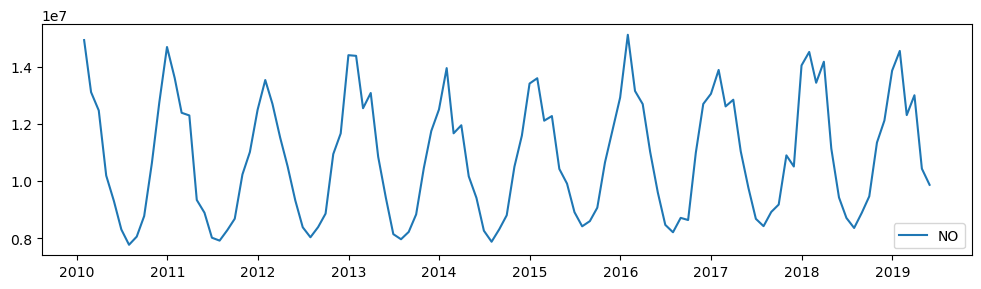

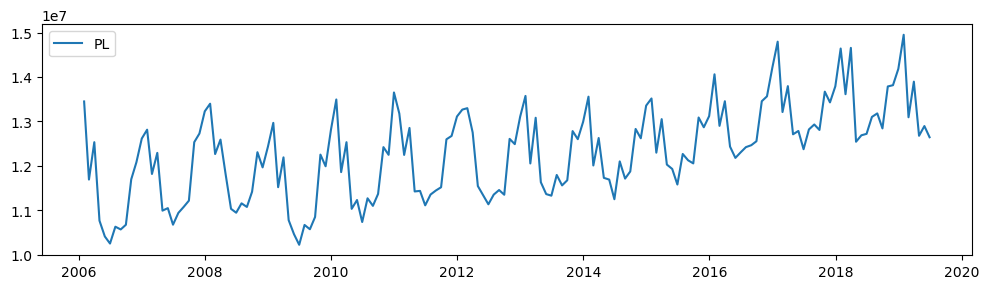

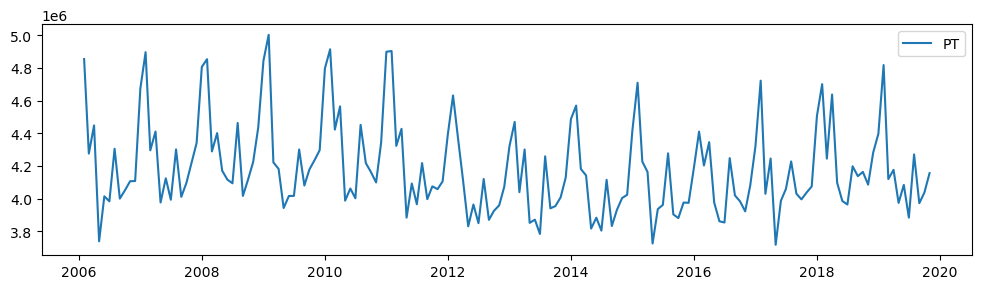

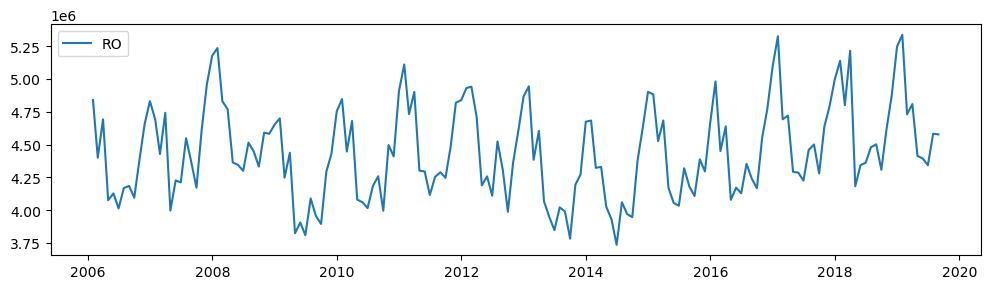

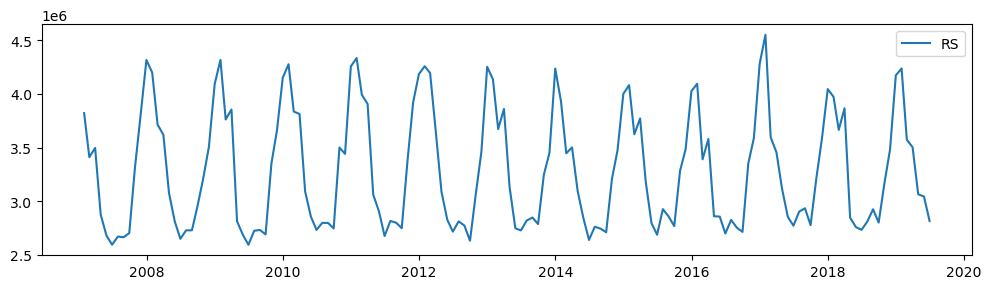

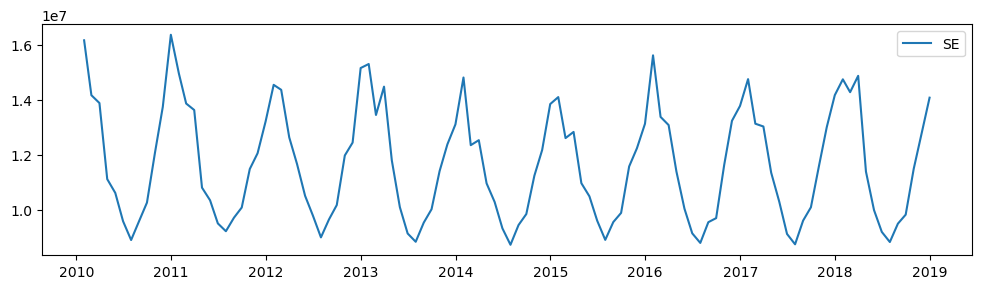

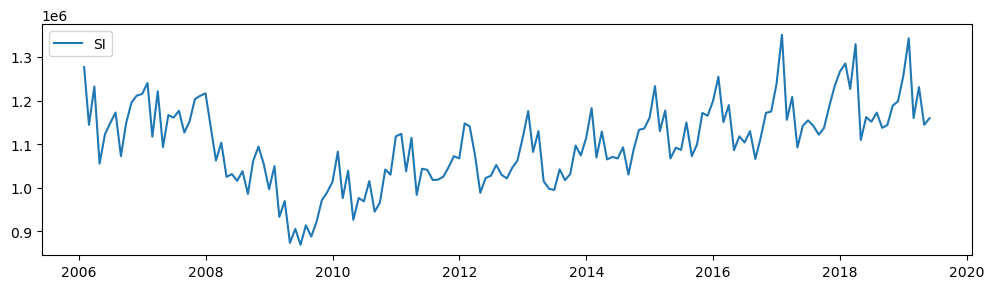

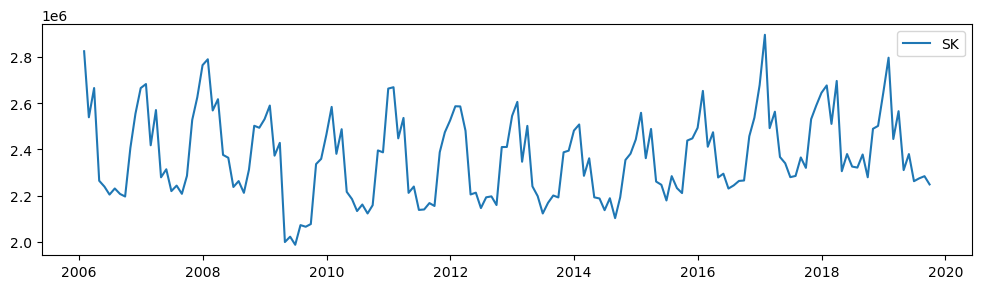

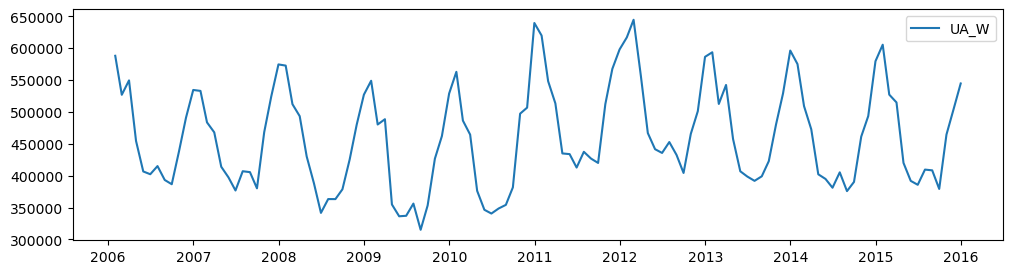

In [137]:
# Create a plot for each group
for name, group in mdf.groupby('country'):
    plt.figure(figsize=(12,3))
    plt.plot(group['date'],group['monthlySumMWh'], label=f'{name}')
    plt.legend()
    plt.show()

In [138]:
mdf.to_csv('data/cleaned_monthly.csv', index=False)